In [1]:
using DifferentialEquations, ModelingToolkit, Plots

@parameters t σ α
@variables x(t) y(t) # x is the State Variable; y the differentiation factor (aka bifurcation paramet
@derivatives D' ~ t


eqs = [ D(x) ~ y*x-x^3, D(y) ~ α]
noiseeqs = [σ, σ] 

potential = SDESystem(eqs, noiseeqs, t, [x,y], [α,σ])

initval = [x => -5.0,y => -5.0] # modify X start -5 (LISI)  # vllt wieder zurueck

tspan = (0.0, 30.0);
params = [α => 0.5, σ => 0.1]
prob = SDEProblem(potential, initval, tspan, params, noise = WienerProcess(0.0, 0.0)); # modify noise to 2D

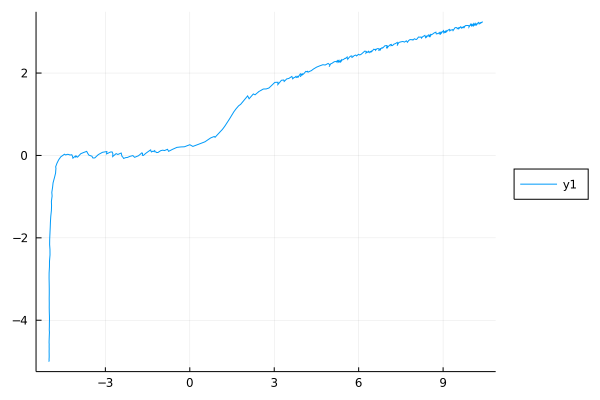

In [2]:
sol = Array(solve(prob))
plot(sol[2,:], sol[1,:],legend = :outerright)

In [3]:
using KernelDensity

In [4]:
kde_sol_2 = kde(sol[2,:]).density;

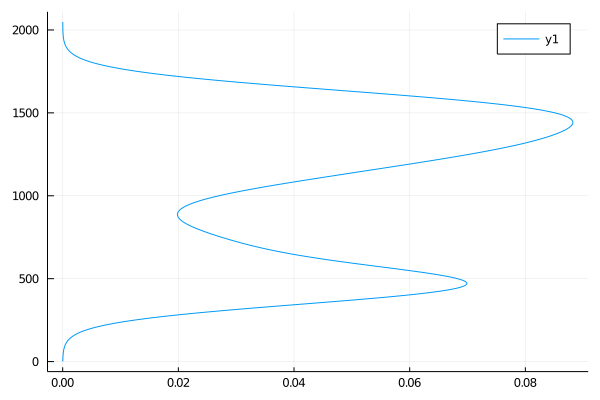

In [5]:
plot(kde_sol_2, 1:length(kde_sol_2))

In [6]:
sols = [Array(solve(prob)) for i in 1:99];
sols_kde_dens = [kde(sols[i][2,:]).density for i in 1:99];

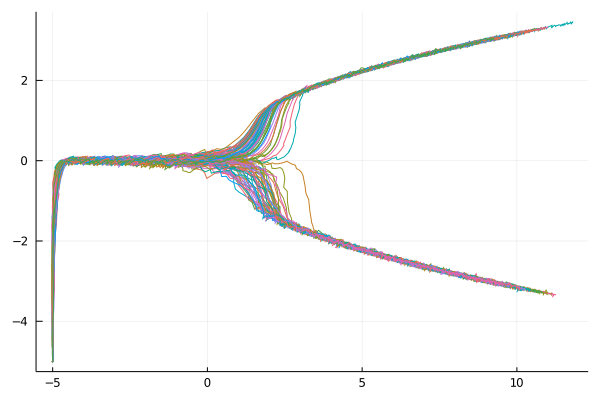

In [7]:
plt = plot()
plts = [plot!(plt, sols[i][2,:], sols[i][1,:],label = "") for i in 1:99]
plot(plt)

In [16]:
plt = plot()
plts = [plot!(plt, sols_kde_dens[i], 1:length(sols_kde_dens[i]), label = "") for i in 1:99]
plot(plt)